# Quiz 4 Solutions: Canonical Correspondence Analysis (CCA)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

Generate synthetic dataset and visualize it:

In [3]:
x1 = np.arange(0,99,1)
x2 = np.sin(2*np.pi*x1/100)
y1 = np.arange(0,99,1)
y2 = -np.sin(2*np.pi*x1/100)
t = np.arange(0,99,1)

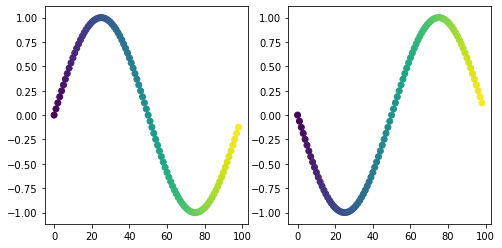

In [4]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(x1,x2,c=t)
plt.subplot(122)
plt.scatter(y1,y2,c=t)

Perform CCA on the two datasets.

In [5]:
xdata = np.asarray([x1,x2]).T
ydata = np.asarray([y1,y2]).T

n_modes = 2 # modes to keep
cca = CCA(n_components=n_modes,max_iter = 100000)
U, V = cca.fit_transform(xdata, ydata)
A = cca.x_weights_ 
B = cca.y_weights_
F = np.cov(xdata.T)@A
G = np.cov(ydata.T)@B
r = [np.corrcoef(U[:,ii],V[:,ii]) for ii in range(n_modes)]

Note that `x_weights_` and `y_weights_` are the weights used, ie canonical coefficents, ie the linear combinations of the original variables.

> TODO: still unsure how eigenvectors arise from these values

In [18]:
# peek at our vectors
print('>> A')
print(A)
print('\n>> B')
print(B)
print('\n>> F')
print(F)
print('\n>> G')
print(G)

>> A
[[ 1.00000000e+00  4.57752402e-16]
 [-4.46142429e-16  1.00000000e+00]]

>> B
[[ 1.00000000e+00  0.00000000e+00]
 [ 5.99024294e-16 -1.00000000e+00]]

>> F
[[ 8.25000000e+02 -1.62029211e+01]
 [-1.62029211e+01  5.10163444e-01]]

>> G
[[ 8.25000000e+02 -1.62029211e+01]
 [ 1.62029211e+01 -5.10163444e-01]]


Now plot first $n$ CCA modes of $F$, $G$, and their loadings (scores) ($U, V$)

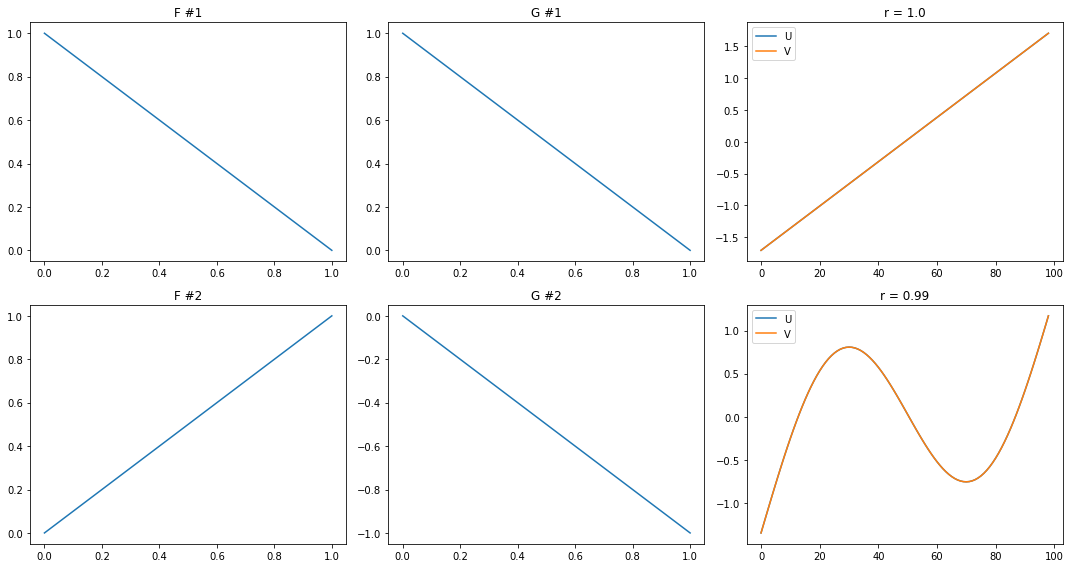

In [9]:
n = 2
cmap = 'RdBu_r'
plt.figure(figsize=(15,8))
for mode in range(n):
    plt.subplot(2,3,3*mode+1)
    plt.plot(A[:,mode])
    plt.title('F #' + str(mode+1))

    plt.subplot(2,3,3*mode+2)
    plt.plot(B[:,mode])
    plt.title('G #' + str(mode+1))

    plt.subplot(2,3,3*mode+3)
    plt.plot(U[:,mode])
    plt.plot(V[:,mode])
    plt.legend(['U','V'])
    plt.title('r = ' + str(r[mode][0,1])[:4])

plt.tight_layout()
plt.show()

Note that $U, V$ are exactly overlapping.